In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Load training data (CSV)
data = pd.read_csv('/content/sign_mnist_train.csv')  # path to your train CSV

# Check structure
print(data.shape)      # should be (num_samples, 785)
print(data.columns)    # first column = label, rest = pixel data


(27455, 785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Separate labels and features
labels = data['label']
images = data.drop('label', axis=1)

# Normalize pixel values to range [0, 1]
images = images / 255.0

# Reshape to 28x28x1 (grayscale image format)
images = images.values.reshape(-1, 28, 28, 1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


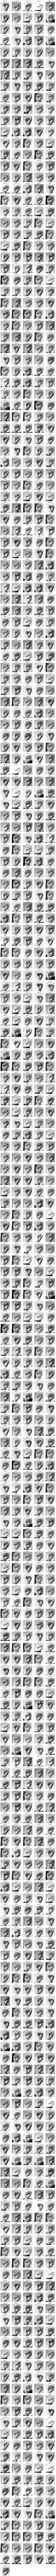

1126


In [ ]:
import matplotlib.pyplot as plt
import math

# Filter images corresponding to label 'A' (which is 0)
A_images = images[labels == 0]
A_labels = labels[labels == 0]

# Number of images to display
num_images = A_images.shape[0]

# Calculate the grid size (e.g., rows and columns) to display images
rows = math.ceil(num_images / 5)  # 5 images per row
cols = 5  # Number of images per row

# Plot all images of class 'A'
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, rows*2))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Display each image in the grid
for i in range(num_images):
    ax = axes[i]
    ax.imshow(A_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: A')
    ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print(num_images)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(25, activation='softmax')  # 25 classes because "J" is missing
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val))


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.3677 - loss: 2.1253 - val_accuracy: 0.9259 - val_loss: 0.2543
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8969 - loss: 0.3116 - val_accuracy: 0.9882 - val_loss: 0.0599
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9640 - loss: 0.1188 - val_accuracy: 0.9984 - val_loss: 0.0150
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9776 - loss: 0.0714 - val_accuracy: 0.9984 - val_loss: 0.0076
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9857 - loss: 0.0458 - val_accuracy: 0.9995 - val_loss: 0.0049
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9924 - loss: 0.0271 - val_accuracy: 0.9998 - val_loss: 0.0027
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9907 - loss: 0.0321 - 

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_accuracy}")


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0014
Validation accuracy: 1.0


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


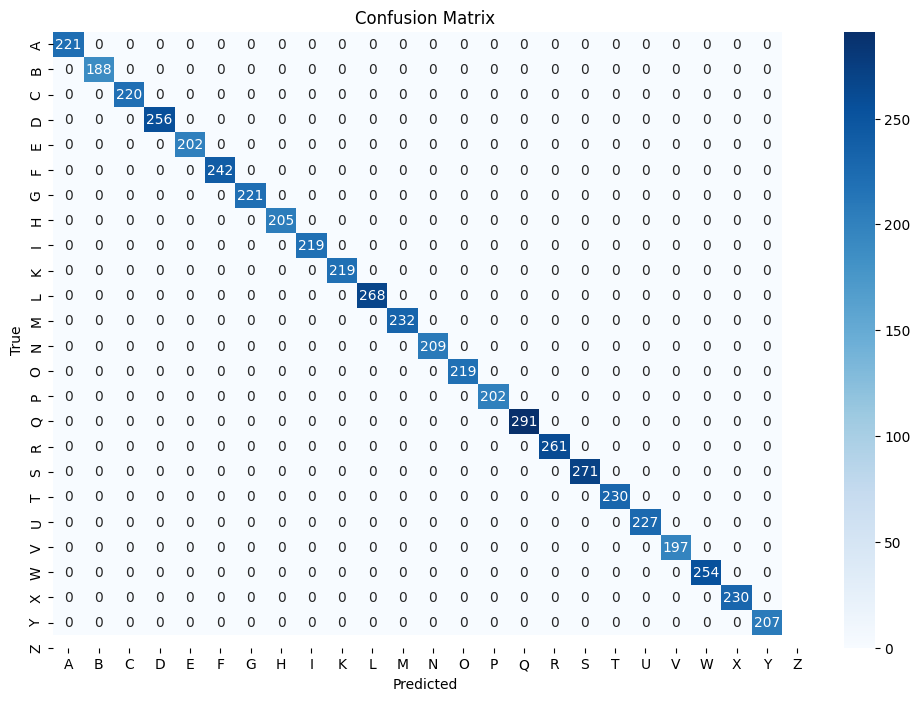

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       221
           B       1.00      1.00      1.00       188
           C       1.00      1.00      1.00       220
           D       1.00      1.00      1.00       256
           E       1.00      1.00      1.00       202
           F       1.00      1.00      1.00       242
           G       1.00      1.00      1.00       221
           H       1.00      1.00      1.00       205
           I       1.00      1.00      1.00       219
           K       1.00      1.00      1.00       219
           L       1.00      1.00      1.00       268
           M       1.00      1.00      1.00       232
           N       1.00      1.00      1.00       209
           O       1.00      1.00      1.00       219
           P       1.00      1.00      1.00       202
           Q       1.00      1.00      1.00       291
           R       1.00      1.00      1.00       261
           S       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
# Predict on validation set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Map numeric labels (0 to 25) to letters (A to Z, skipping J)
labels_used = [i for i in range(26) if i != 9]  # 0-25, excluding 9
letters_used = [chr(i + 65) for i in range(26) if i != 9]  # A-Z, skipping J

# Plot Confusion Matrix with letters as labels
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=letters_used, yticklabels=letters_used)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred, labels=labels_used, target_names=letters_used))


In [ ]:
# Load test CSV
test_data = pd.read_csv('/content/sign_mnist_test.csv')

# Separate features
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1)

# Normalize and reshape
test_images = test_images / 255.0
test_images = test_images.values.reshape(-1, 28, 28, 1)

# Predict
test_preds = np.argmax(model.predict(test_images), axis=1)

# Map number back to letters (A-Z skipping J)
predicted_letters = [chr(i + 65) if i < 9 else chr(i + 66) for i in test_preds]
true_letters = [chr(i + 65) if i < 9 else chr(i + 66) for i in test_labels]

# Show first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_letters[i]} - Actual: {true_letters[i]}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Predicted: G - Actual: G
Predicted: F - Actual: F
Predicted: L - Actual: L
Predicted: A - Actual: A
Predicted: D - Actual: D
Predicted: W - Actual: W
Predicted: L - Actual: L
Predicted: P - Actual: P
Predicted: D - Actual: D
Predicted: H - Actual: H


In [ ]:
from sklearn.metrics import accuracy_score

# Compute test accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9156441717791411


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


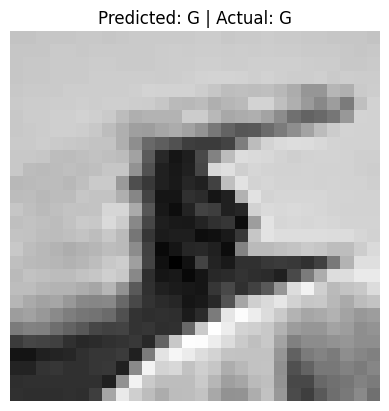

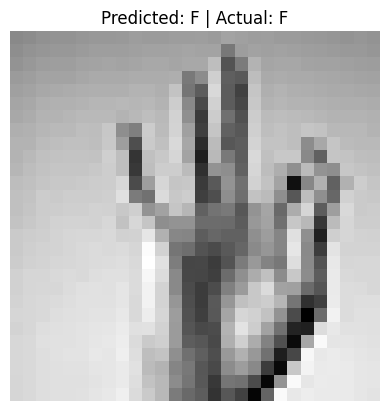

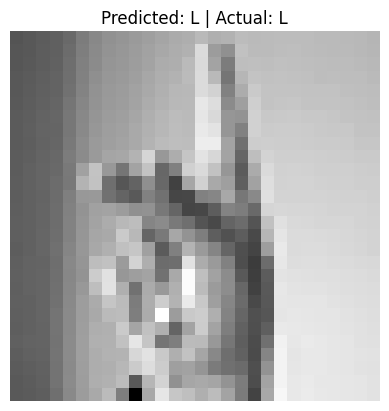

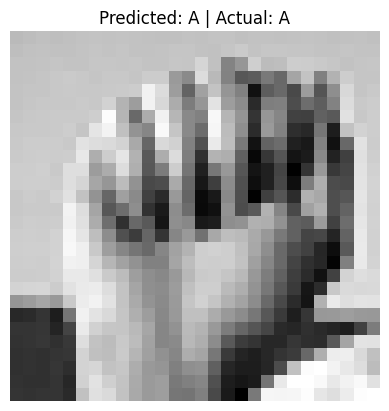

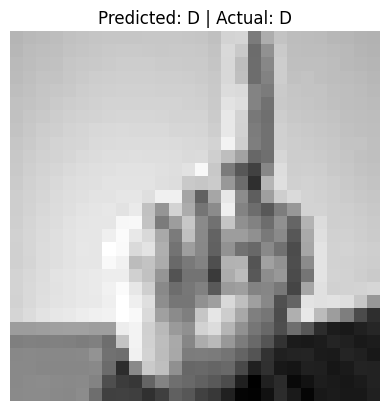

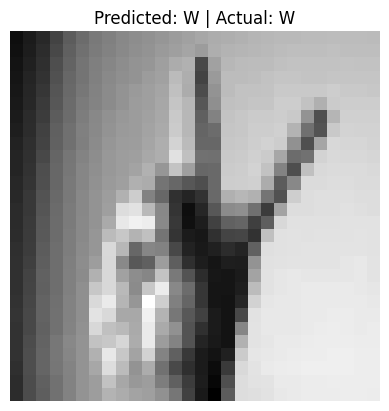

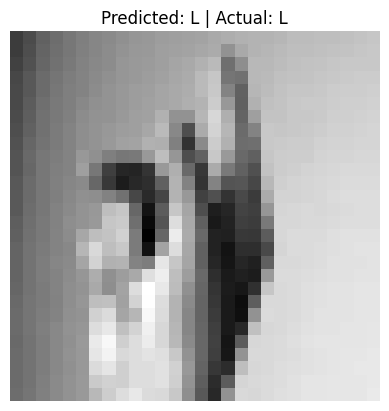

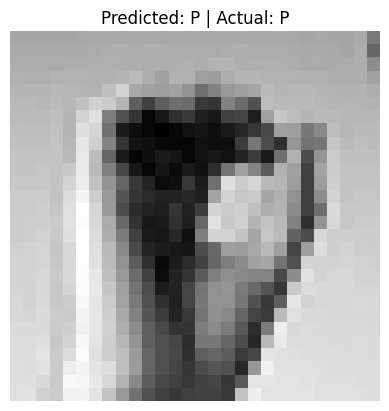

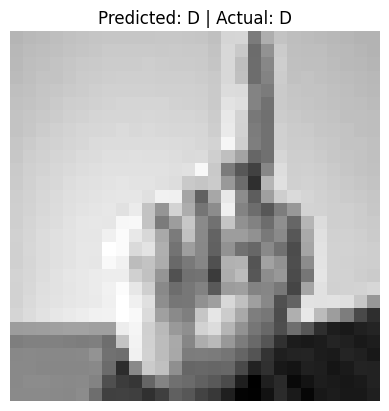

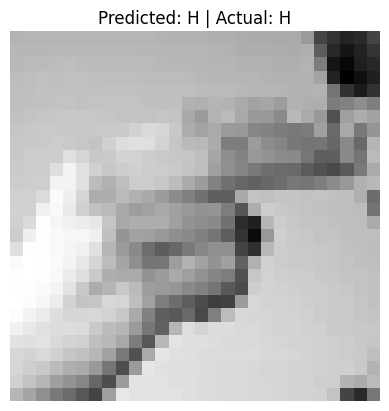

In [ ]:
import matplotlib.pyplot as plt

# Load test CSV
test_data = pd.read_csv('/content/sign_mnist_test.csv')

# Separate features
test_labels = test_data['label']
test_images = test_data.drop('label', axis=1)

# Normalize and reshape
test_images = test_images / 255.0
test_images = test_images.values.reshape(-1, 28, 28, 1)

# Predict
test_preds = np.argmax(model.predict(test_images), axis=1)

# Map number back to letters (A-Z skipping J)
def num_to_char(num):
    return chr(num + 65) if num < 9 else chr(num + 66)

predicted_letters = [num_to_char(i) for i in test_preds]
true_letters = [num_to_char(i) for i in test_labels]

# Show first 10 predictions with image
for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_letters[i]} | Actual: {true_letters[i]}")
    plt.axis('off')
    plt.show()
